Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.04000495313549117571
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.5946208033461174883
(0002, 0013) Implementation Version Name         SH: 'EXCITE3M5_BIGFMI'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 1032
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.124.113543.6006.99.04000

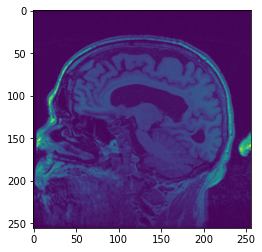

In [2]:
Config = {}
Config['root_path'] = r'I:\New folder\MPRAGE2\ADNI\002_S_0782\MP-RAGE\2008-10-17_09_33_59.0'
filename = 'I122112\ADNI_002_S_0782_MR_MP-RAGE__br_raw_20081017201429549_96_S57626_I122112.dcm'

ds = dicom.dcmread(osp.join(Config['root_path'], filename))
print(ds)
print(ds.pixel_array)
plt.imshow(ds.pixel_array)
plt.show()

# Dataset Pre-Processing and Creation

## Import packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path as osp
import pydicom as dicom
from os import walk
import math
import pandas as pd
import csv

## Utility functions

In [3]:
# get all the filenames in each dataset of a subject
def get_all_filenames(dir_path):
    DEBUG = False
    # all the images of a subject
    subject_dataset = []

    # get all the filenames and paths in each sub dir of a subject
    for (dirpath, dirnames, filenames) in walk(dir_path):
        f = []
        full_dirpath = ''
        #print(dirpath)
        #print(dirnames)
            
        # the bottom of directories
        if len(dirnames) == 0:
            full_dirpath = dirpath
            f = filenames
            if DEBUG: print(full_dirpath)           
            for j in range(len(f)):
                #print(f[j])
                f[j] = osp.join(full_dirpath, f[j])
            #for j in f:
            #    print(j)
            #    ds = dicom.dcmread(j)
            subject_dataset.append(f)
            
    #print(len(subject_dataset))
    #for i in subject_dataset:
    #    print(len(i))
    
    return subject_dataset
    
# extracing the middle +- 15% of the image set
def extract_middle(subject_dataset, threshold):
    DEBUG = False
    STATUS = False
    subject_trimmed_dataset = []
    #reg_ex = r"(?<=_)[0-9]{1,4}(?=_S[0-9]{3,12}_I[0-9]{3,12}.dcm$)"

    for i in subject_dataset:
        #print(i)
        #print(len(i))
        if STATUS: print(f"Length of original dataset = {len(i)}")

        middle = len(i) / 2 + 1
        #print(middle)
        start_index = math.ceil(middle - len(i) * threshold)
        end_index = math.floor(middle + len(i) * threshold) + 1
        if DEBUG: 
            print(start_index)
            print(end_index)

        for j in i:
            #x = re.search(reg_ex, j)
            #img_index = int(x.group())
            img_index = int(j.split("_")[-3])
            
            if start_index <= img_index and img_index < end_index:
                subject_trimmed_dataset.append(j)
                if DEBUG: print(img_index)
            if img_index > 1000:
                print('ERROR: IMAGE INDEX')
        
        #for j in subject_trimmed_dataset:
        #    print(j)
        if STATUS: print(f"Length of trimmed dataset = {len(i[start_index:end_index])}")
        
    return subject_trimmed_dataset

# return label of the subject (CN, AD, etc.)
def get_subject_label(subject_id, df):
    #print(df['Subject'] == subject_id)
    #print(df['Group'][df['Subject'] == subject_id])
    group_list = df['Group'][df['Subject'] == subject_id].to_numpy()
    #print(group_list)
    
    return group_list[0]

## Paths

In [4]:
top_root_dir = r"I:\New folder"
sub_dir = "MPRAGE2\ADNI"

## Read labels from the CSV file

In [5]:
csv_filename = 'MPRAGE2_11_30_2021.csv'
df = pd.read_csv(osp.join(top_root_dir, csv_filename))
print(df)

      Image Data ID     Subject Group Sex  Age  Visit Modality  \
0          I1486321  941_S_6998    CN   M   57      1      MRI   
1          I1467526  941_S_6962    AD   F   75      1      MRI   
2          I1428390  941_S_6854    AD   M   87    102      MRI   
3          I1291638  941_S_6854    AD   M   86      1      MRI   
4          I1310783  941_S_6803   MCI   F   75      1      MRI   
...             ...         ...   ...  ..  ...    ...      ...   
18784       I114210  002_S_0295    CN   M   87      6      MRI   
18785        I55275  002_S_0295    CN   M   86      4      MRI   
18786       I303067  002_S_0295    CN   M   91     28      MRI   
18787       I173739  002_S_0295    CN   M   89     10      MRI   
18788        I28561  002_S_0295    CN   M   85      3      MRI   

                       Description      Type    Acq Date Format  Downloaded  
0      Accelerated Sagittal MPRAGE  Original   8/30/2021    DCM  11/29/2021  
1      Accelerated Sagittal MPRAGE  Original   7/13

## Summary of classes

In [7]:
df['Group'].value_counts()

MCI        6001
CN         5745
EMCI       2745
AD         2440
LMCI       1389
SMC         459
Patient      10
Name: Group, dtype: int64

## Check subject_id and labels

In [5]:
# Look for subject_id from root path
root_path = osp.join(top_root_dir, sub_dir)
for (dirpath, dirnames, filenames) in walk(root_path):
    break
subject_id_list = dirnames
print(subject_id_list)

# Check labels
for subject_id in subject_id_list:
    label = get_subject_label(subject_id, df)
    print(label)

['002_S_0295', '002_S_0413', '002_S_0559', '002_S_0619', '002_S_0685', '002_S_0729', '002_S_0782', '002_S_0816', '002_S_0954', '002_S_0955', '002_S_1018', '002_S_1070', '002_S_1155', '002_S_1261', '002_S_1268', '002_S_1280', '002_S_2010', '002_S_2043', '002_S_2073', '002_S_4171', '002_S_4219', '002_S_4229', '002_S_4237', '002_S_4251', '002_S_4262', '002_S_4270', '002_S_4447', '002_S_4473', '002_S_4521', '002_S_4654', '002_S_4746', '002_S_4799', '002_S_5018', '002_S_5178', '002_S_5230', '002_S_5256', '002_S_6053', '002_S_6404', '003_S_0907', '003_S_0908', '003_S_0981', '003_S_1057', '003_S_1059', '003_S_1074', '003_S_1122', '003_S_4288', '003_S_6257', '003_S_6258', '003_S_6264', '003_S_6268', '003_S_6307', '005_S_0221', '005_S_0222', '005_S_0223', '005_S_0324', '005_S_0448', '005_S_0546', '005_S_0553', '005_S_0572', '005_S_0602', '005_S_0610', '005_S_0814', '005_S_0929', '005_S_1224', '005_S_1341', '006_S_0498', '006_S_0521', '006_S_0547', '006_S_0675', '006_S_0681', '006_S_0731', '006_

AD
CN
MCI
AD
MCI
CN
CN
MCI
CN
AD
LMCI
CN
LMCI
CN
CN
LMCI
AD
LMCI
AD
LMCI
MCI
CN
MCI
CN
MCI
MCI
MCI
MCI
AD
MCI
MCI
MCI
CN
CN
AD
AD
EMCI
CN
MCI
CN
CN
CN
CN
CN
MCI
AD
AD
EMCI
EMCI
CN
LMCI
EMCI
LMCI
CN
LMCI
EMCI
LMCI
EMCI
EMCI
AD
SMC
SMC
SMC
AD
AD
CN
CN
CN
MCI
CN
AD
AD
MCI
CN
CN
CN
AD
CN
AD
CN
CN
CN
CN
AD
MCI
AD
MCI
MCI
MCI
MCI
MCI
MCI
MCI
EMCI
CN
CN
CN
CN
EMCI
CN
LMCI
EMCI
AD
AD
EMCI
AD
AD
CN
MCI
MCI
CN
AD
AD
AD
AD
MCI
CN
MCI
CN
MCI
MCI
CN
MCI
MCI
EMCI
CN
LMCI
EMCI
EMCI
CN
CN
CN
SMC
SMC
SMC
SMC
MCI
MCI
MCI
CN
AD
MCI
AD
CN
AD
MCI
AD
MCI
CN
EMCI
EMCI
LMCI
EMCI
LMCI
CN
CN
LMCI
CN
EMCI
LMCI
AD
SMC
MCI
MCI
AD
AD
CN
CN
CN
MCI
CN
MCI
MCI
AD
EMCI
EMCI
AD
LMCI
LMCI
CN
CN
LMCI
EMCI
CN
CN
CN
AD
LMCI
CN
CN
CN
CN
CN
CN
MCI
CN
MCI
CN
MCI
CN
CN
MCI
MCI
AD
MCI
MCI
MCI
MCI
MCI
MCI
AD
MCI
AD
CN
AD
CN
MCI
MCI
AD
CN
CN
MCI
MCI
MCI
MCI
MCI
AD
CN
MCI
CN
MCI
AD
AD
EMCI
EMCI
EMCI
EMCI
CN
CN
CN
CN
CN
EMCI
AD
EMCI
EMCI
LMCI
AD
MCI
AD
EMCI
LMCI
CN
AD
LMCI
AD
EMCI
CN
AD
SMC
MCI
MCI
MCI
MCI
AD
CN
CN
CN
EMCI
LMCI
SMC


## Extract image filenames 

In [6]:
# extract the middle +-15% of each dataset
threshold = 0.15

all_subjects = []

for subject_id in subject_id_list:
    label = get_subject_label(subject_id, df)
    #print(label)
    dir_path = osp.join(root_path, subject_id)
    print(dir_path)
    subject_dataset = get_all_filenames(dir_path)
    subject_trimmed_dataset = extract_middle(subject_dataset, threshold)
    
    all_subjects.append([subject_trimmed_dataset, label, subject_id])

I:\New folder\MPRAGE2\ADNI\002_S_0295
I:\New folder\MPRAGE2\ADNI\002_S_0413
I:\New folder\MPRAGE2\ADNI\002_S_0559
I:\New folder\MPRAGE2\ADNI\002_S_0619
I:\New folder\MPRAGE2\ADNI\002_S_0685
I:\New folder\MPRAGE2\ADNI\002_S_0729
I:\New folder\MPRAGE2\ADNI\002_S_0782
I:\New folder\MPRAGE2\ADNI\002_S_0816
I:\New folder\MPRAGE2\ADNI\002_S_0954
I:\New folder\MPRAGE2\ADNI\002_S_0955
I:\New folder\MPRAGE2\ADNI\002_S_1018
I:\New folder\MPRAGE2\ADNI\002_S_1070
I:\New folder\MPRAGE2\ADNI\002_S_1155
I:\New folder\MPRAGE2\ADNI\002_S_1261
I:\New folder\MPRAGE2\ADNI\002_S_1268
I:\New folder\MPRAGE2\ADNI\002_S_1280
I:\New folder\MPRAGE2\ADNI\002_S_2010
I:\New folder\MPRAGE2\ADNI\002_S_2043
I:\New folder\MPRAGE2\ADNI\002_S_2073
I:\New folder\MPRAGE2\ADNI\002_S_4171
I:\New folder\MPRAGE2\ADNI\002_S_4219
I:\New folder\MPRAGE2\ADNI\002_S_4229
I:\New folder\MPRAGE2\ADNI\002_S_4237
I:\New folder\MPRAGE2\ADNI\002_S_4251
I:\New folder\MPRAGE2\ADNI\002_S_4262
I:\New folder\MPRAGE2\ADNI\002_S_4270
I:\New folde

I:\New folder\MPRAGE2\ADNI\013_S_4395
I:\New folder\MPRAGE2\ADNI\013_S_4579
I:\New folder\MPRAGE2\ADNI\013_S_4580
I:\New folder\MPRAGE2\ADNI\013_S_4595
I:\New folder\MPRAGE2\ADNI\013_S_4616
I:\New folder\MPRAGE2\ADNI\013_S_4917
I:\New folder\MPRAGE2\ADNI\013_S_4985
I:\New folder\MPRAGE2\ADNI\013_S_5071
I:\New folder\MPRAGE2\ADNI\013_S_5137
I:\New folder\MPRAGE2\ADNI\013_S_6970
I:\New folder\MPRAGE2\ADNI\014_S_0169
I:\New folder\MPRAGE2\ADNI\014_S_0328
I:\New folder\MPRAGE2\ADNI\014_S_0356
I:\New folder\MPRAGE2\ADNI\014_S_0519
I:\New folder\MPRAGE2\ADNI\014_S_0520
I:\New folder\MPRAGE2\ADNI\014_S_0548
I:\New folder\MPRAGE2\ADNI\014_S_0557
I:\New folder\MPRAGE2\ADNI\014_S_0558
I:\New folder\MPRAGE2\ADNI\014_S_0563
I:\New folder\MPRAGE2\ADNI\014_S_0658
I:\New folder\MPRAGE2\ADNI\014_S_1095
I:\New folder\MPRAGE2\ADNI\014_S_2185
I:\New folder\MPRAGE2\ADNI\014_S_2308
I:\New folder\MPRAGE2\ADNI\014_S_4039
I:\New folder\MPRAGE2\ADNI\014_S_4058
I:\New folder\MPRAGE2\ADNI\014_S_4079
I:\New folde

I:\New folder\MPRAGE2\ADNI\024_S_4158
I:\New folder\MPRAGE2\ADNI\024_S_4169
I:\New folder\MPRAGE2\ADNI\024_S_4223
I:\New folder\MPRAGE2\ADNI\024_S_4280
I:\New folder\MPRAGE2\ADNI\024_S_4392
I:\New folder\MPRAGE2\ADNI\024_S_4622
I:\New folder\MPRAGE2\ADNI\024_S_4674
I:\New folder\MPRAGE2\ADNI\024_S_4905
I:\New folder\MPRAGE2\ADNI\024_S_5290
I:\New folder\MPRAGE2\ADNI\024_S_6005
I:\New folder\MPRAGE2\ADNI\024_S_6184
I:\New folder\MPRAGE2\ADNI\024_S_6385
I:\New folder\MPRAGE2\ADNI\024_S_6846
I:\New folder\MPRAGE2\ADNI\027_S_0074
I:\New folder\MPRAGE2\ADNI\027_S_0116
I:\New folder\MPRAGE2\ADNI\027_S_0118
I:\New folder\MPRAGE2\ADNI\027_S_0120
I:\New folder\MPRAGE2\ADNI\027_S_0179
I:\New folder\MPRAGE2\ADNI\027_S_0256
I:\New folder\MPRAGE2\ADNI\027_S_0307
I:\New folder\MPRAGE2\ADNI\027_S_0403
I:\New folder\MPRAGE2\ADNI\027_S_0404
I:\New folder\MPRAGE2\ADNI\027_S_0408
I:\New folder\MPRAGE2\ADNI\027_S_0417
I:\New folder\MPRAGE2\ADNI\027_S_0461
I:\New folder\MPRAGE2\ADNI\027_S_0485
I:\New folde

I:\New folder\MPRAGE2\ADNI\036_S_6897
I:\New folder\MPRAGE2\ADNI\037_S_0150
I:\New folder\MPRAGE2\ADNI\037_S_0182
I:\New folder\MPRAGE2\ADNI\037_S_0303
I:\New folder\MPRAGE2\ADNI\037_S_0327
I:\New folder\MPRAGE2\ADNI\037_S_0377
I:\New folder\MPRAGE2\ADNI\037_S_0454
I:\New folder\MPRAGE2\ADNI\037_S_0467
I:\New folder\MPRAGE2\ADNI\037_S_0501
I:\New folder\MPRAGE2\ADNI\037_S_0539
I:\New folder\MPRAGE2\ADNI\037_S_0552
I:\New folder\MPRAGE2\ADNI\037_S_0566
I:\New folder\MPRAGE2\ADNI\037_S_0588
I:\New folder\MPRAGE2\ADNI\037_S_0627
I:\New folder\MPRAGE2\ADNI\037_S_1078
I:\New folder\MPRAGE2\ADNI\037_S_1225
I:\New folder\MPRAGE2\ADNI\037_S_1421
I:\New folder\MPRAGE2\ADNI\037_S_4001
I:\New folder\MPRAGE2\ADNI\037_S_4015
I:\New folder\MPRAGE2\ADNI\037_S_4028
I:\New folder\MPRAGE2\ADNI\037_S_4030
I:\New folder\MPRAGE2\ADNI\037_S_4071
I:\New folder\MPRAGE2\ADNI\037_S_4146
I:\New folder\MPRAGE2\ADNI\037_S_4214
I:\New folder\MPRAGE2\ADNI\037_S_4302
I:\New folder\MPRAGE2\ADNI\037_S_4308
I:\New folde

I:\New folder\MPRAGE2\ADNI\070_S_6229
I:\New folder\MPRAGE2\ADNI\070_S_6236
I:\New folder\MPRAGE2\ADNI\070_S_6886
I:\New folder\MPRAGE2\ADNI\070_S_6911
I:\New folder\MPRAGE2\ADNI\072_S_0315
I:\New folder\MPRAGE2\ADNI\072_S_1211
I:\New folder\MPRAGE2\ADNI\072_S_1380
I:\New folder\MPRAGE2\ADNI\072_S_2026
I:\New folder\MPRAGE2\ADNI\072_S_2027
I:\New folder\MPRAGE2\ADNI\072_S_2037
I:\New folder\MPRAGE2\ADNI\072_S_2072
I:\New folder\MPRAGE2\ADNI\072_S_2083
I:\New folder\MPRAGE2\ADNI\072_S_2093
I:\New folder\MPRAGE2\ADNI\072_S_2116
I:\New folder\MPRAGE2\ADNI\072_S_2164
I:\New folder\MPRAGE2\ADNI\072_S_4007
I:\New folder\MPRAGE2\ADNI\072_S_4057
I:\New folder\MPRAGE2\ADNI\072_S_4063
I:\New folder\MPRAGE2\ADNI\072_S_4102
I:\New folder\MPRAGE2\ADNI\072_S_4103
I:\New folder\MPRAGE2\ADNI\072_S_4131
I:\New folder\MPRAGE2\ADNI\072_S_4206
I:\New folder\MPRAGE2\ADNI\072_S_4226
I:\New folder\MPRAGE2\ADNI\072_S_4383
I:\New folder\MPRAGE2\ADNI\072_S_4390
I:\New folder\MPRAGE2\ADNI\072_S_4391
I:\New folde

I:\New folder\MPRAGE2\ADNI\114_S_6113
I:\New folder\MPRAGE2\ADNI\114_S_6251
I:\New folder\MPRAGE2\ADNI\114_S_6524
I:\New folder\MPRAGE2\ADNI\114_S_6597
I:\New folder\MPRAGE2\ADNI\116_S_0360
I:\New folder\MPRAGE2\ADNI\116_S_0361
I:\New folder\MPRAGE2\ADNI\116_S_0370
I:\New folder\MPRAGE2\ADNI\116_S_0382
I:\New folder\MPRAGE2\ADNI\116_S_0392
I:\New folder\MPRAGE2\ADNI\116_S_0487
I:\New folder\MPRAGE2\ADNI\116_S_0648
I:\New folder\MPRAGE2\ADNI\116_S_0649
I:\New folder\MPRAGE2\ADNI\116_S_0657
I:\New folder\MPRAGE2\ADNI\116_S_0752
I:\New folder\MPRAGE2\ADNI\116_S_0834
I:\New folder\MPRAGE2\ADNI\116_S_0890
I:\New folder\MPRAGE2\ADNI\116_S_1083
I:\New folder\MPRAGE2\ADNI\116_S_1232
I:\New folder\MPRAGE2\ADNI\116_S_1243
I:\New folder\MPRAGE2\ADNI\116_S_1249
I:\New folder\MPRAGE2\ADNI\116_S_1271
I:\New folder\MPRAGE2\ADNI\116_S_1315
I:\New folder\MPRAGE2\ADNI\116_S_4010
I:\New folder\MPRAGE2\ADNI\116_S_4043
I:\New folder\MPRAGE2\ADNI\116_S_4092
I:\New folder\MPRAGE2\ADNI\116_S_4167
I:\New folde

I:\New folder\MPRAGE2\ADNI\131_S_0409
I:\New folder\MPRAGE2\ADNI\131_S_0441
I:\New folder\MPRAGE2\ADNI\131_S_0457
I:\New folder\MPRAGE2\ADNI\131_S_0691
I:\New folder\MPRAGE2\ADNI\131_S_1301
I:\New folder\MPRAGE2\ADNI\131_S_1389
I:\New folder\MPRAGE2\ADNI\131_S_5138
I:\New folder\MPRAGE2\ADNI\131_S_5148
I:\New folder\MPRAGE2\ADNI\131_S_6170
I:\New folder\MPRAGE2\ADNI\131_S_6519
I:\New folder\MPRAGE2\ADNI\132_S_0987
I:\New folder\MPRAGE2\ADNI\133_S_0433
I:\New folder\MPRAGE2\ADNI\133_S_0488
I:\New folder\MPRAGE2\ADNI\133_S_0493
I:\New folder\MPRAGE2\ADNI\133_S_0525
I:\New folder\MPRAGE2\ADNI\133_S_0629
I:\New folder\MPRAGE2\ADNI\133_S_0638
I:\New folder\MPRAGE2\ADNI\133_S_0727
I:\New folder\MPRAGE2\ADNI\133_S_0771
I:\New folder\MPRAGE2\ADNI\133_S_0792
I:\New folder\MPRAGE2\ADNI\133_S_0912
I:\New folder\MPRAGE2\ADNI\133_S_0913
I:\New folder\MPRAGE2\ADNI\133_S_1031
I:\New folder\MPRAGE2\ADNI\133_S_1055
I:\New folder\MPRAGE2\ADNI\133_S_1170
I:\New folder\MPRAGE2\ADNI\135_S_4281
I:\New folde

I:\New folder\MPRAGE2\ADNI\941_S_4187
I:\New folder\MPRAGE2\ADNI\941_S_4255
I:\New folder\MPRAGE2\ADNI\941_S_4292
I:\New folder\MPRAGE2\ADNI\941_S_4365
I:\New folder\MPRAGE2\ADNI\941_S_4376
I:\New folder\MPRAGE2\ADNI\941_S_4377
I:\New folder\MPRAGE2\ADNI\941_S_4420
I:\New folder\MPRAGE2\ADNI\941_S_4764
I:\New folder\MPRAGE2\ADNI\941_S_5124
I:\New folder\MPRAGE2\ADNI\941_S_5193
I:\New folder\MPRAGE2\ADNI\941_S_6054
I:\New folder\MPRAGE2\ADNI\941_S_6058
I:\New folder\MPRAGE2\ADNI\941_S_6068
I:\New folder\MPRAGE2\ADNI\941_S_6080
I:\New folder\MPRAGE2\ADNI\941_S_6094
I:\New folder\MPRAGE2\ADNI\941_S_6333
I:\New folder\MPRAGE2\ADNI\941_S_6499
I:\New folder\MPRAGE2\ADNI\941_S_6546
I:\New folder\MPRAGE2\ADNI\941_S_6580
I:\New folder\MPRAGE2\ADNI\941_S_6854


## Data inspection

In [7]:
print(len(all_subjects))

1535


In [8]:
all_subjects[0][2]

'002_S_0295'

In [9]:
subject_trimmed_dataset = all_subjects[252][0]
print(len(subject_trimmed_dataset))

53


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7 10 ... 36 19 19]
 [ 0  0  0 ... 20 35 25]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161901382_109_S611745_I907712.dcm


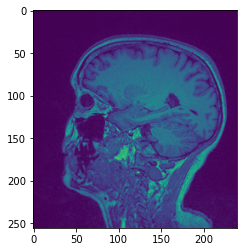

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  2  3 ... 50 45 17]
 [ 0  0  0 ... 37 25 30]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161903161_94_S611745_I907712.dcm


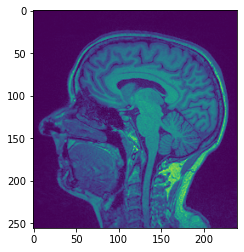

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  6 ... 49 30 22]
 [ 0  0  0 ... 29 40 35]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161908511_108_S611745_I907712.dcm


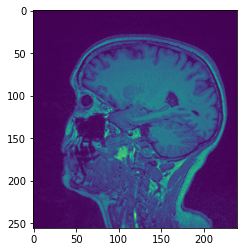

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  2  4 ... 21 25 11]
 [ 0  0  0 ... 24 22 24]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161909369_93_S611745_I907712.dcm


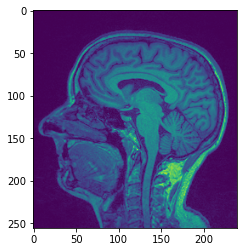

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  2 ... 53 28 27]
 [ 0  0  0 ... 28  9 27]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161912848_95_S611745_I907712.dcm


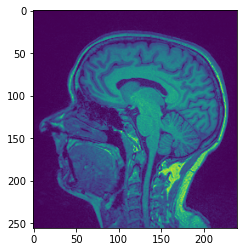

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 11  8 ... 18 17 22]
 [ 0  0  0 ... 19 23 27]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161912957_110_S611745_I907712.dcm


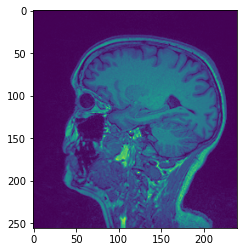

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  4 ... 20 19 30]
 [ 0  0  0 ... 30 18 42]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161927684_106_S611745_I907712.dcm


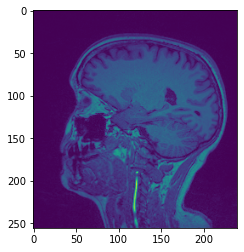

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  9  6 ... 20 20 17]
 [ 0  0  0 ...  9 27 20]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161936435_92_S611745_I907712.dcm


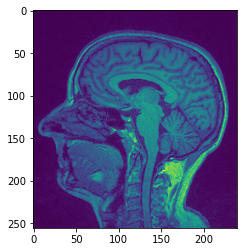

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  8  7 ...  9 23 18]
 [ 0  0  0 ... 11 22 37]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161936857_107_S611745_I907712.dcm


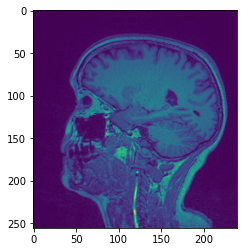

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  5 10 ... 22 34 17]
 [ 0  0  0 ... 13 30 13]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922161959804_96_S611745_I907712.dcm


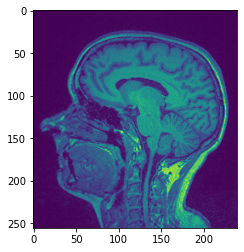

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 11 15 ... 27 29 31]
 [ 0  0  0 ... 24 15 30]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162006746_97_S611745_I907712.dcm


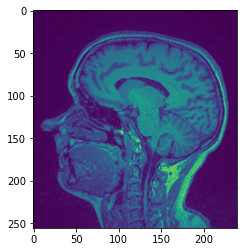

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7 12 ... 17 15 22]
 [ 0  0  0 ... 32 19 17]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162013610_68_S611745_I907712.dcm


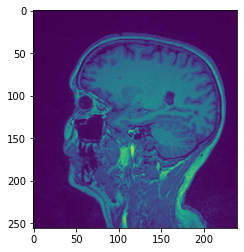

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  1 ... 13 12 21]
 [ 0  0  0 ... 26 12 13]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162014515_83_S611745_I907712.dcm


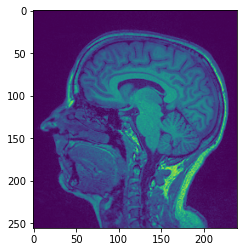

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 13 12 ...  8 14 24]
 [ 0  0  0 ... 26 35 26]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162015108_67_S611745_I907712.dcm


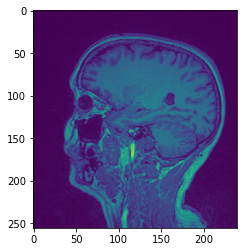

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  6 ... 23 21 30]
 [ 0  0  0 ... 30 40 20]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162019601_69_S611745_I907712.dcm


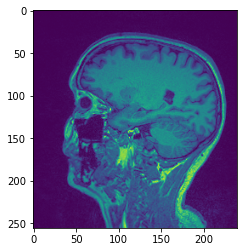

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  5  5 ...  7 21 21]
 [ 0  0  0 ... 16  8 15]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162026075_84_S611745_I907712.dcm


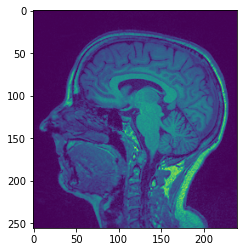

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  6 ... 25 27 24]
 [ 0  0  0 ... 28 13 28]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162027401_80_S611745_I907712.dcm


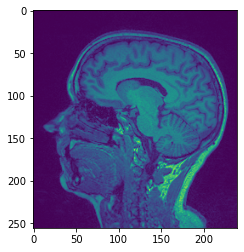

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  3  5 ... 25 15 18]
 [ 0  0  0 ... 29 14 14]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162035138_82_S611745_I907712.dcm


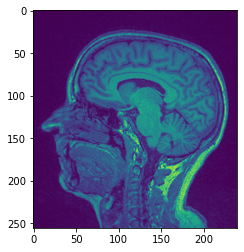

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  8 ... 30 29 21]
 [ 0  0  0 ... 29  8 21]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162036573_81_S611745_I907712.dcm


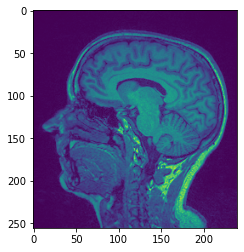

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  7 ... 20 16 20]
 [ 0  0  0 ... 27 15 24]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162041097_111_S611745_I907712.dcm


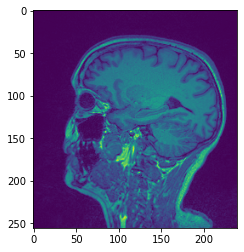

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  8 ... 23 17 14]
 [ 0  0  0 ...  8  7  5]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162056760_112_S611745_I907712.dcm


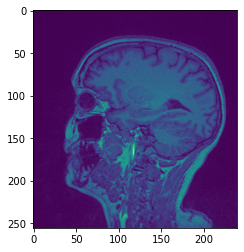

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  8  7 ... 25 37 13]
 [ 0  0  0 ... 29 21 26]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162102423_71_S611745_I907712.dcm


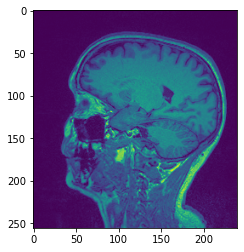

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  8  8 ... 25 32 35]
 [ 0  0  0 ... 26 25 20]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162106338_70_S611745_I907712.dcm


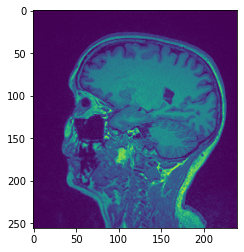

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  9  6 ... 17 14 10]
 [ 0  0  0 ... 16 13 16]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162107337_85_S611745_I907712.dcm


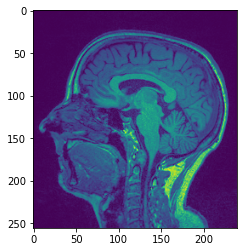

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  7 ... 17 36 32]
 [ 0  0  0 ... 18 24 36]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162112859_72_S611745_I907712.dcm


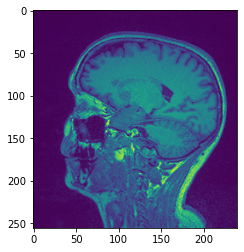

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  7 ... 15 17 18]
 [ 0  0  0 ... 14 20 16]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162125292_101_S611745_I907712.dcm


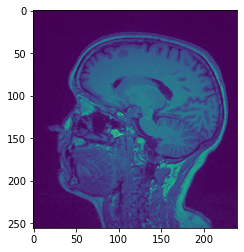

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 12  6 ... 26 24 25]
 [ 0  0  0 ... 12 28 20]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162132936_102_S611745_I907712.dcm


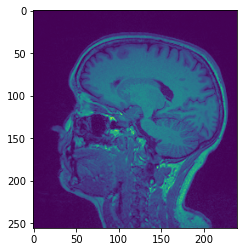

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  3  6 ... 34 19  9]
 [ 0  0  0 ... 25 21 15]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162138303_114_S611745_I907712.dcm


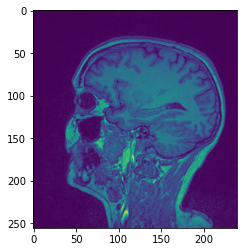

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  5 ... 26 14 24]
 [ 0  0  0 ... 27 32 41]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162139831_99_S611745_I907712.dcm


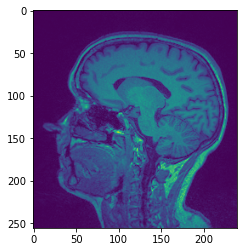

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 11  9 ... 28 19 21]
 [ 0  0  0 ... 27  9 24]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162142780_98_S611745_I907712.dcm


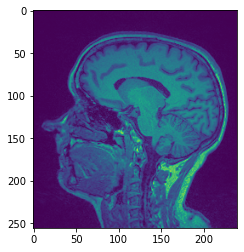

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  7 ... 45 36 17]
 [ 0  0  0 ... 18 13 15]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162143248_113_S611745_I907712.dcm


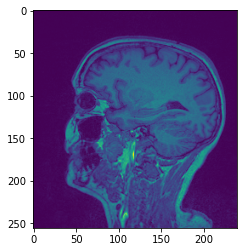

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6 10 ... 14 12 18]
 [ 0  0  0 ... 19 27 29]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162147491_100_S611745_I907712.dcm


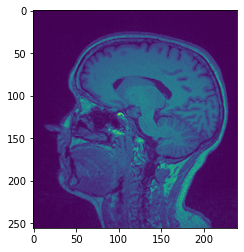

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  8  8 ... 14 20 21]
 [ 0  0  0 ... 20 36 32]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162147912_115_S611745_I907712.dcm


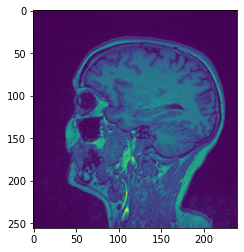

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  2  8 ...  9  9 11]
 [ 0  0  0 ... 27 10 16]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162205353_86_S611745_I907712.dcm


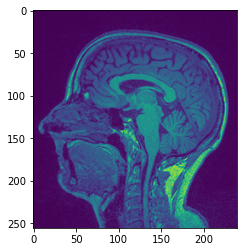

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  8 12 ... 15 39 23]
 [ 0  0  0 ... 24 45 10]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162210127_104_S611745_I907712.dcm


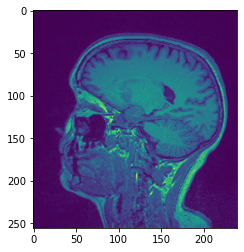

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 13 11 ... 25 29 24]
 [ 0  0  0 ... 11 29 18]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162214120_103_S611745_I907712.dcm


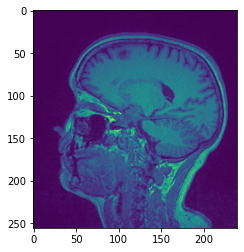

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  3  9 ... 26 31 23]
 [ 0  0  0 ... 31 34 28]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162228503_90_S611745_I907712.dcm


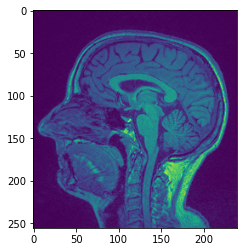

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  7 ... 29 31 38]
 [ 0  0  0 ...  9 26 24]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162229611_75_S611745_I907712.dcm


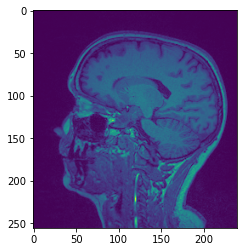

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  2  4 ... 19 19 17]
 [ 0  0  0 ...  9 12  9]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162234509_77_S611745_I907712.dcm


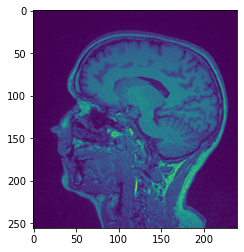

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  3 ... 27 26 17]
 [ 0  0  0 ... 22 19 18]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162235196_76_S611745_I907712.dcm


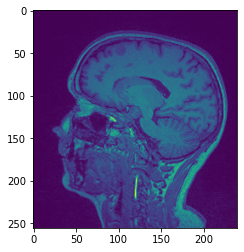

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  9 10 ... 28 32 22]
 [ 0  0  0 ... 11 37 24]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162235633_91_S611745_I907712.dcm


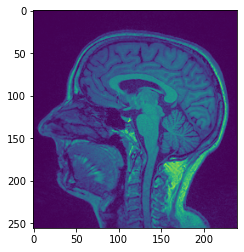

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  6 ... 34 40 41]
 [ 0  0  0 ... 24 38 35]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162241795_73_S611745_I907712.dcm


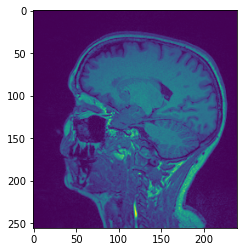

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  5 ... 30 20 22]
 [ 0  0  0 ... 11 18 21]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162242185_88_S611745_I907712.dcm


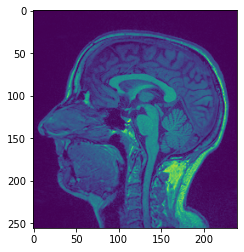

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  3  7 ... 18  8 17]
 [ 0  0  0 ... 18 10 25]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162242793_87_S611745_I907712.dcm


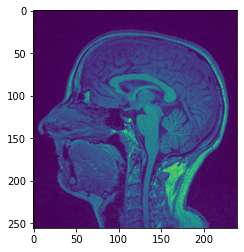

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  6 ... 42 40 39]
 [ 0  0  0 ... 18 39 27]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162245695_74_S611745_I907712.dcm


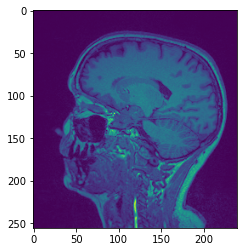

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  3 ... 31 18 26]
 [ 0  0  0 ... 39 24 25]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162246225_89_S611745_I907712.dcm


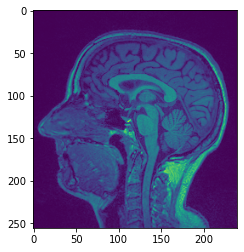

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 11  6 ... 16 22 38]
 [ 0  0  0 ... 23 19 18]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162257629_66_S611745_I907712.dcm


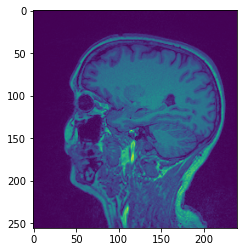

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  5  6 ... 35 23 22]
 [ 0  0  0 ... 26 15 12]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162300265_65_S611745_I907712.dcm


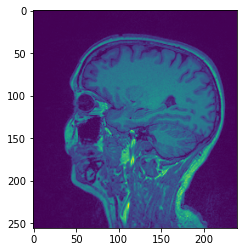

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  8 10 ... 28 24 33]
 [ 0  0  0 ... 38 20 24]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162307332_105_S611745_I907712.dcm


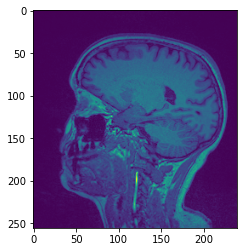

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  2  6 ... 21 19 16]
 [ 0  0  0 ... 19 11 20]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162313275_78_S611745_I907712.dcm


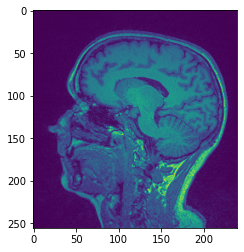

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 14  6 ... 37 40 34]
 [ 0  0  0 ... 23 30 17]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162314960_63_S611745_I907712.dcm


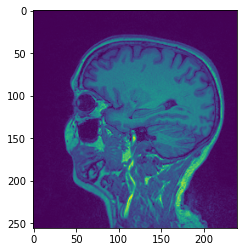

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  6  6 ... 11 19 18]
 [ 0  0  0 ... 11 26 19]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162320857_79_S611745_I907712.dcm


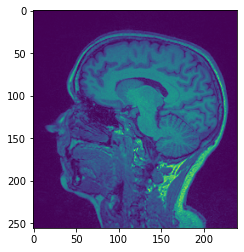

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  4 ... 41 20 13]
 [ 0  0  0 ... 27 28 15]
 [ 0  0  0 ...  0  0  0]]
I:\New folder\MPRAGE2\ADNI\014_S_6076\Accelerated_Sagittal_MPRAGE\2017-09-22_09_43_54.0\I907712\ADNI_014_S_6076_MR_Accelerated_Sagittal_MPRAGE__br_raw_20170922162322401_64_S611745_I907712.dcm


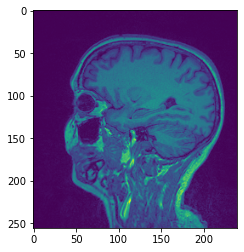

In [16]:
for i in subject_trimmed_dataset:
    ds = dicom.dcmread(i)
    print(ds.pixel_array)
    print(i)
    plt.imshow(ds.pixel_array)
    plt.show()

## Write to a CSV file

In [11]:
csv_file = open('files_and_labels.csv', 'w', newline='', encoding='utf-8')
writer = csv.writer(csv_file)
writer.writerow(['file', 'label', 'subject_id'])

for subject in all_subjects:
    subject_trimmed_dataset = subject[0]
    label = subject[1]
    subject_id = subject[2]
    
    for j in subject_trimmed_dataset:
        writer.writerow([j, label, subject_id])
        
csv_file.close()        